In [47]:
#POLYNOMIAL REGRESSION

In [48]:
# Y=B0+B1X+B2X2+B3X3+...+e(error rate)

In [49]:
#in multiple regression x values may be different, bu there x is the same but it is like x square x cube etc.
#or in polynomial regression x1 and x2, x1 cube x2 cube etc.


In [50]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv("maaslar.csv")
df=data.copy()
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


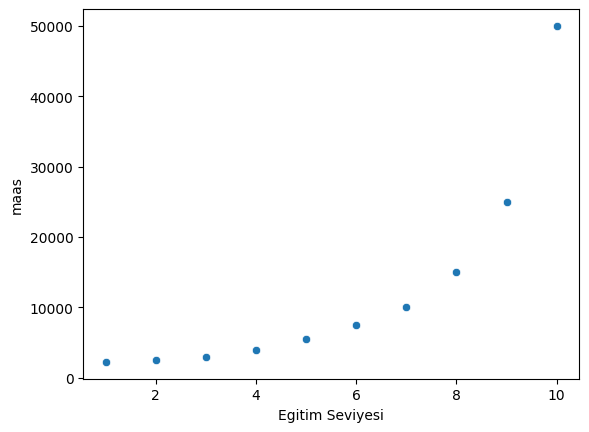

In [52]:
sbn.scatterplot(x="Egitim Seviyesi",y="maas",data=df)
plt.show()

In [53]:
#split data as x ,y
x=df[["Egitim Seviyesi"]]
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [54]:
#split data as x ,y
y=df[["maas"]]
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


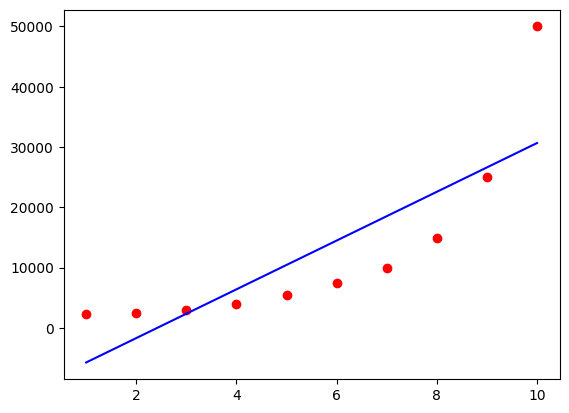

In [55]:
#in this dataset linear relationship is meaningless but lets try

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x,y)

y_precited=lr.predict(x)
plt.scatter(x,y,color="red")
plt.plot(x,y_precited,color="blue")
plt.show()

In [56]:
#polynomial regression
#degree 2

from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

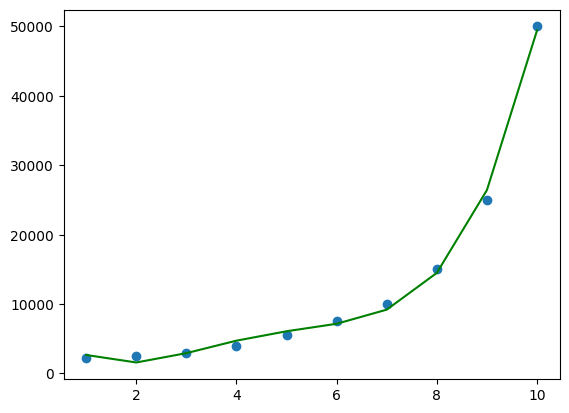

In [57]:
lr2=LinearRegression()
lr2.fit(x_poly,y)
y_predicted_2=lr2.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,y_predicted_2,color="green")

In [58]:
#change degree as 4 above and run the same code again

In [59]:
#predict some random values in linear regression
print(lr.predict([[11]]))
print(lr.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
#predict some random values in polynomial regression
print(lr2.predict(poly_reg.transform([[11]])))
print(lr2.predict(poly_reg.transform([[6.6]])))

#this is more successfull

[[89041.66666669]]
[[8146.9948718]]


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [65]:
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000
